In [ ]:
# Sentiment Analysis (12th May)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [13]:
df=pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')
df = df.head(500)

In [14]:
ax = df['Score'].value_counts().sort_index().plot(kind="bar", figsize=(10, 5))
ax.set_xlabel('Review Stars')
ax.set_ylabel('No. of Reviews')
plt.show()

## VADER Sentiment Scoring
- Stop words are removed
- each word is scored and combined total score

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
example = df['Text'][250]

In [16]:
sia.polarity_scores("wow this notebook is so good")

{'neg': 0.0, 'neu': 0.347, 'pos': 0.653, 'compound': 0.8196}

In [17]:
sia.polarity_scores("this sucks too much")

{'neg': 0.455, 'neu': 0.545, 'pos': 0.0, 'compound': -0.3612}

In [18]:

sia.polarity_scores(example)

{'neg': 0.047, 'neu': 0.781, 'pos': 0.172, 'compound': 0.9476}

In [19]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [20]:
totalData = pd.DataFrame(res).T
totalData = totalData.reset_index().rename(columns={'index':'id'})
totalData = totalData.merge(df, how='left', left_index=True, right_index=True)
print(totalData)

      id    neg    neu    pos  compound   Id   ProductId          UserId  \
0      1  0.000  0.695  0.305    0.9441    1  B001E4KFG0  A3SGXH7AUHU8GW   
1      2  0.079  0.853  0.068   -0.1027    2  B00813GRG4  A1D87F6ZCVE5NK   
2      3  0.091  0.754  0.155    0.8265    3  B000LQOCH0   ABXLMWJIXXAIN   
3      4  0.000  1.000  0.000    0.0000    4  B000UA0QIQ  A395BORC6FGVXV   
4      5  0.000  0.552  0.448    0.9468    5  B006K2ZZ7K  A1UQRSCLF8GW1T   
..   ...    ...    ...    ...       ...  ...         ...             ...   
495  496  0.000  0.554  0.446    0.9725  496  B000G6RYNE   APGAA43E3WPN7   
496  497  0.059  0.791  0.150    0.8215  497  B000G6RYNE    ABR7HU5H1KNE   
497  498  0.025  0.762  0.212    0.9848  498  B000G6RYNE   AJQD2WWJYOYFQ   
498  499  0.041  0.904  0.055    0.1280  499  B000G6RYNE  A16YH487W9ZYO0   
499  500  0.000  0.678  0.322    0.9811  500  B000G6RYNE   A83YQC1XOU4CS   

                         ProfileName  HelpfulnessNumerator  \
0                        

In [21]:
totalData.head()

id    neg    neu    pos  compound  Id   ProductId          UserId  \
0   1  0.000  0.695  0.305    0.9441   1  B001E4KFG0  A3SGXH7AUHU8GW   
1   2  0.079  0.853  0.068   -0.1027   2  B00813GRG4  A1D87F6ZCVE5NK   
2   3  0.091  0.754  0.155    0.8265   3  B000LQOCH0   ABXLMWJIXXAIN   
3   4  0.000  1.000  0.000    0.0000   4  B000UA0QIQ  A395BORC6FGVXV   
4   5  0.000  0.552  0.448    0.9468   5  B006K2ZZ7K  A1UQRSCLF8GW1T   

                       ProfileName  HelpfulnessNumerator  \
0                       delmartian                     1   
1                           dll pa                     0   
2  Natalia Corres "Natalia Corres"                     1   
3                             Karl                     3   
4    Michael D. Bigham "M. Wassir"                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   
2                       1      4  1219017600  "Delight" says it all   
3                       3      2  1307923200         Cough Medicine   
4                       0      5  1350777600            Great taffy   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a wid...

In [22]:
ax = sns.barplot(data=totalData, x='Score', y = 'compound')
ax.set_title('Compound Score by Amazon Star Review')
ax.set_ylabel('Sentiment Score')
plt.show()

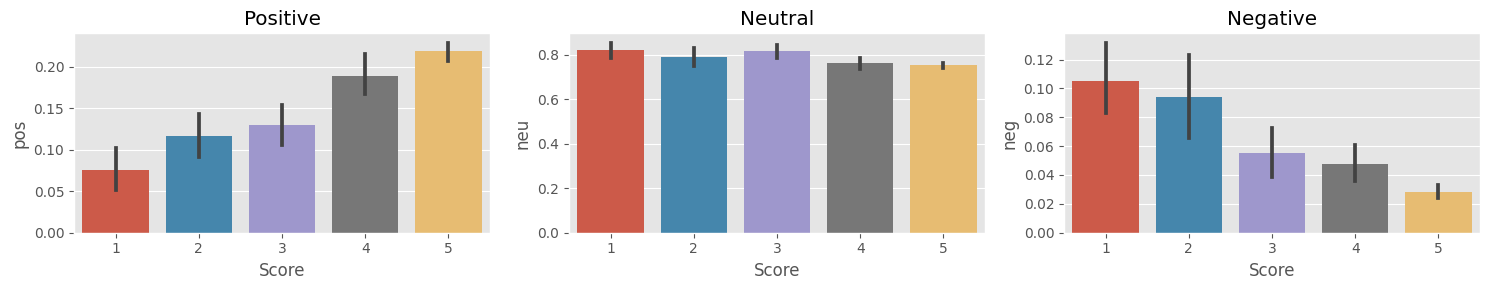

In [23]:
fig, axs = plt.subplots(1,3, figsize=(15,3))
sns.barplot(data=totalData, x='Score', y = 'pos', ax=axs[0])
sns.barplot(data=totalData, x='Score', y = 'neu', ax=axs[1])
sns.barplot(data=totalData, x='Score', y = 'neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta Pretrained Model
- Use a model trained  of a large language model
- Transformer model accounts for words but also the context related to other words.

In [24]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [99]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [36]:
print(example)

WOW!  This product is very impressive. I bought the 8oz blueberry and was pleased with packaging, price and shipping.  The powder dissolves instantly.  Even in water!  I've just been mixing a 1/4 tsp in a small glass of water for now and drinking it down and it tastes great!, but will add it to my smoothies and juiced fruit juices next. This product is so economical compared to purchasing fresh blueberries, especially because there is no waste due to mold or overripe berries thrown away.  I think you could add this to baked or unbaked foods as well.  I'm excited to add more of the SuperFoods to my diet in this fast and easy way. I definitely will being trying the other flavors soon.


In [40]:
vaderResult = sia.polarity_scores(example)
print(vaderResult)

{'neg': 0.047, 'neu': 0.781, 'pos': 0.172, 'compound': 0.9476}


In [48]:
encoded_text= tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
robertaResult = {
    "neg" : scores[0],
    "neu" : scores[1],
    "pos" : scores[2]
}

print(scores_dict)

{'roberta_neg': 0.0018104169, 'roberta_neu': 0.012259974, 'roberta_pos': 0.98592967}


In [66]:
def roberta_sentiment_scores(text):
    encoded_text= tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    robertaResult = {
        "roberts_neg" : scores[0],
        "roberta_neu" : scores[1],
        "roberta_pos" : scores[2]
    }
    return robertaResult

res = {}

for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        text= row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = roberta_sentiment_scores(text)

        bothResults = {**vader_result_rename, **roberta_result }
        
        res[myid] = bothResults
    except RuntimeError:
        print(f"Broke for id: {myid}")
    

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id: 83
Broke for id: 187


In [134]:
finalResults = pd.DataFrame(res).T
finalResults = finalResults.reset_index().rename(columns={'index':'id'})
finalResults = finalResults.merge(df, how='left', left_index=True, right_index=True)

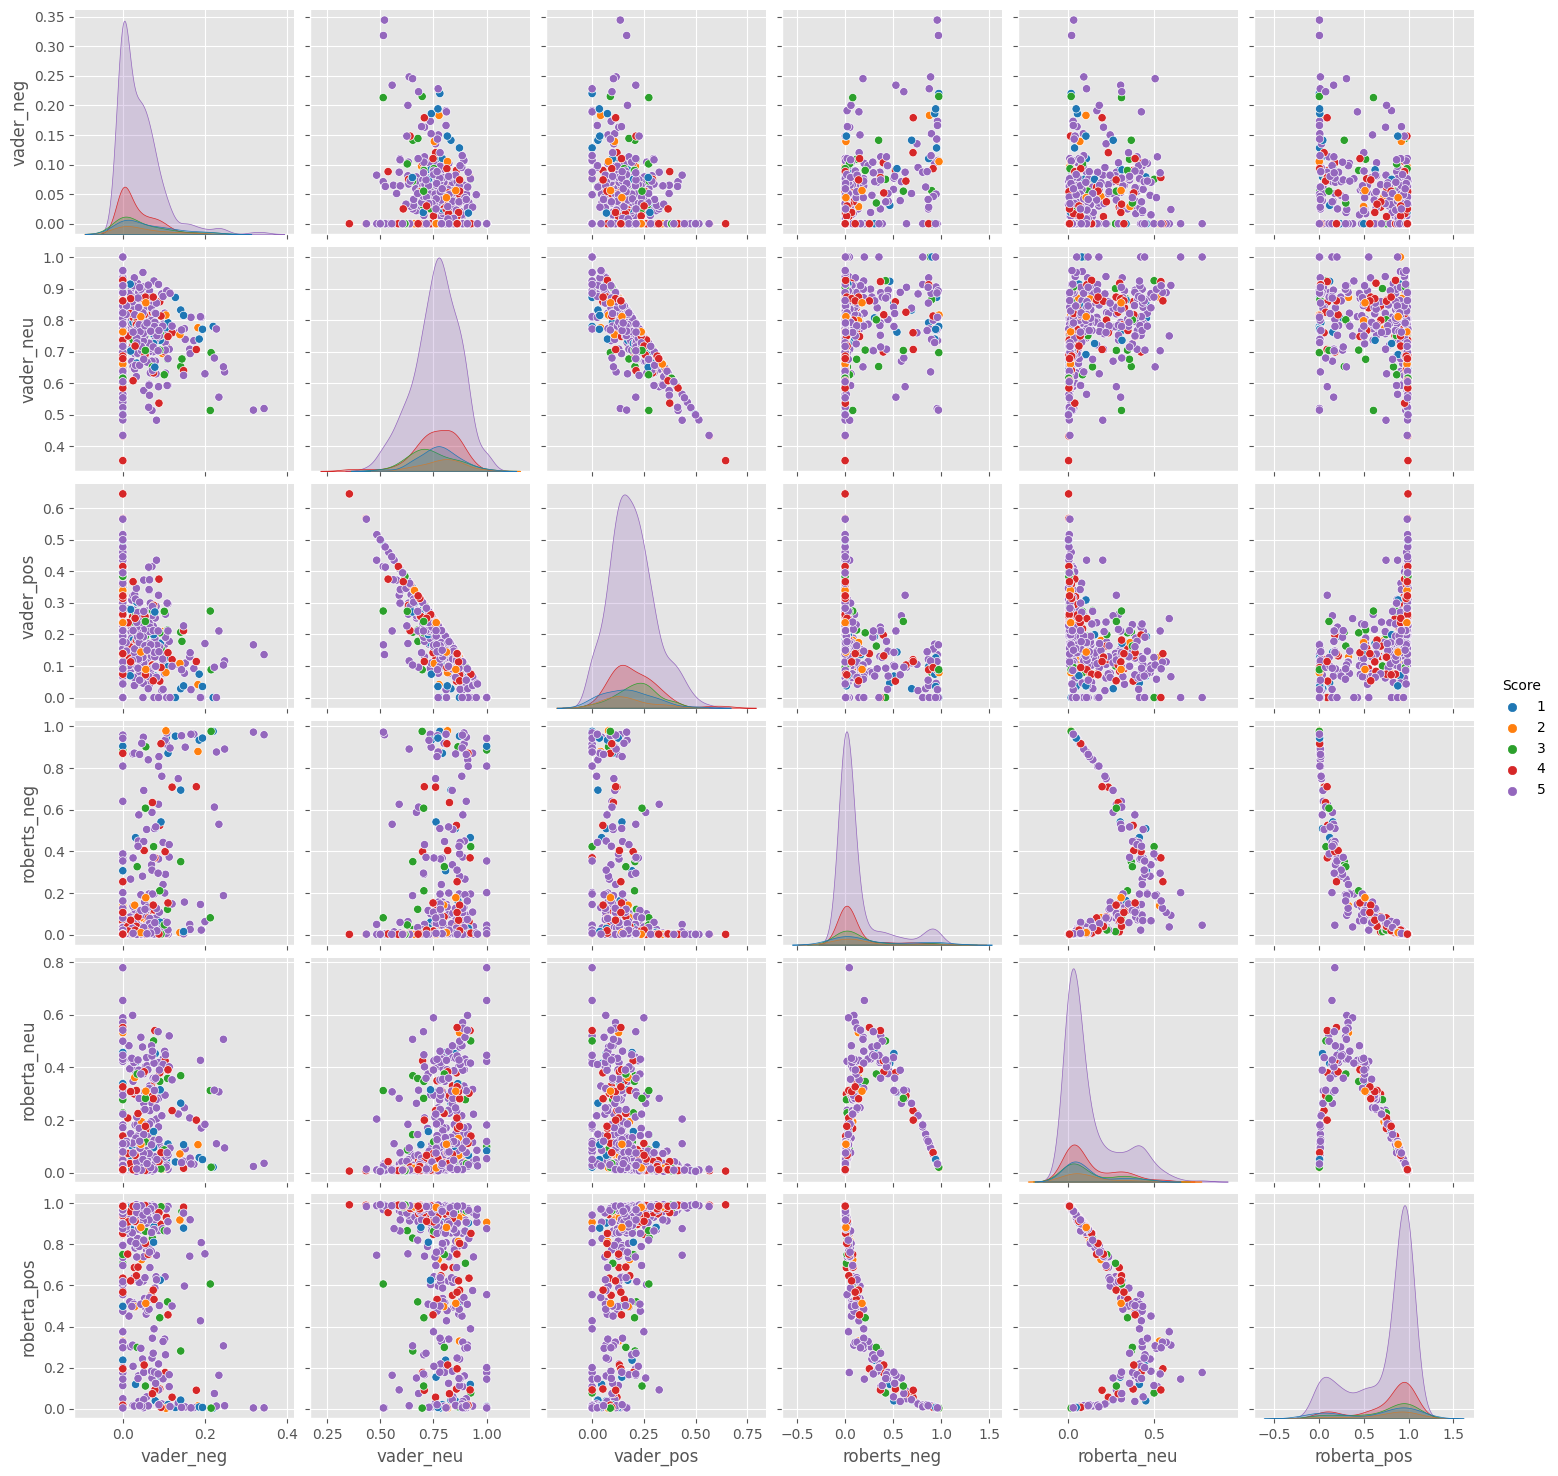

In [82]:
import warnings

# Suppress the FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)


sns.pairplot(data=finalResults, 
             vars=[
                 'vader_neg', 'vader_neu', 'vader_pos', 
               'roberts_neg', 'roberta_neu', 'roberta_pos'
             ],
            hue='Score',
            palette='tab10')

plt.show()

## Transformers Pipeline

In [115]:
from transformers import pipeline
defaultPipeline = pipeline("sentiment-analysis", model=`)
robertaPipeline = pipeline("sentiment-analysis", model=MODEL)

In [120]:
goodEx = "This is so good. I'll use it again"
badEx = "This is so awful. Please don't buy it"

In [133]:
print(defaultPipeline(goodEx)[0]['label'])
print(defaultPipeline(badEx)[0]['label'])
print(robertaPipeline(goodEx)[0]['label'])
print(robertaPipeline(badEx)[0]['label'])

POSITIVE
NEGATIVE
LABEL_2
LABEL_0
